## Lending club case study

### Data description
**Loan data**
It contains the complete loan data for all loans issued through the time period 2007 to 2011.

**Data dictionary**
It describes the meaning of these variables provided in loan data.

### Business problem
The data given above contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Goals
We will approach our analysis w.r.to below common goals:

#### Data Dictionary Analysis
   - Data size
   - Remove null values
   
#### Loan data analysis

**1. Know Your Data**
   - Data size
   - Columns and thier data types
   - Check data spread
   - Numeric vs Categorical Columns   

**2. Data Quality & Fix**
   - Check null values
   - Delete irrelevant data
   - Impute null values
   - Check duplicates
   - Data cleaning

**3. Derived Columns for Analysis**

**4. Data Content Analysis**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

**5. Conclusion**



In [419]:
import pandas as pd

# This is to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [342]:
# Load the data dictionary and loan data into pandas
data_dictionary = pd.read_excel('../data/Data_Dictionary.xlsx')
loan_data = pd.read_csv('../data/loan.csv', low_memory=False)

###  Data Dictionary Analysis
   - Data size
   - Remove null values

In [343]:
data_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 1000.0+ bytes


In [344]:
# We see a few NaN's in the end.
data_dictionary.head().append(data_dictionary.tail())

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN
116,NaN,* Employer Title replaces Employer Name for al...


In [345]:
# Cleaning up null values, as there are only 3 nulls and they are not used.
data_dictionary.dropna(inplace=True)

In [346]:
data_dictionary.shape

(115, 2)

#### Conclusion of Data dictionary analysis
We noticed that there are only 3 nulls. Apart from that data looks clean. We removed that as part of initial analysis.
Now, we have a clean data dictionary, ready for use.

## Loan data analysis

### 1. Know You Data

In [347]:
loan_data.info(
    verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [348]:
all_null_column_percentage = 100 * (loan_data.isna().all(axis=0).sum() / loan_data.columns.size)
print('%.2f' % all_null_column_percentage, 'percent columns have 0 non-null values')

some_null_column_percentage = 100 * ((loan_data.isna().any(axis=0).sum() / loan_data.columns.size)) - all_null_column_percentage
print('%.2f' % some_null_column_percentage, 'percent columns have some non-null values (excluding complete non-nulls)')

48.65 percent columns have 0 non-null values
12.61 percent columns have some non-null values (excluding complete non-nulls)


Notice there are many columns with 0 non-null values, and a few with some non-nulls

In [349]:
# Check Categorical and Numerical variables
loan_data.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [350]:
# See all the columns that contain categorical data
cat_columns = list(loan_data.select_dtypes(include="object"))
cat_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

Certain columns like `int_rate` and `emp_length` can fall into numerical variables

We can check the unique values for each columns. This will be helpful to understand if we have **univariate data**, or **binary data**, any **ordinal data**, or any **continuous data**. Based on this, we can later think of binning these continuous values.

In [351]:
# For each numerical feature compute number of unique entries
unique_values = loan_data.nunique().sort_values()
unique_values[unique_values > 0].head(20)

policy_code                    1
collections_12_mths_ex_med     1
acc_now_delinq                 1
application_type               1
tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
pymnt_plan                     1
initial_list_status            1
next_pymnt_d                   2
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
dtype: int64

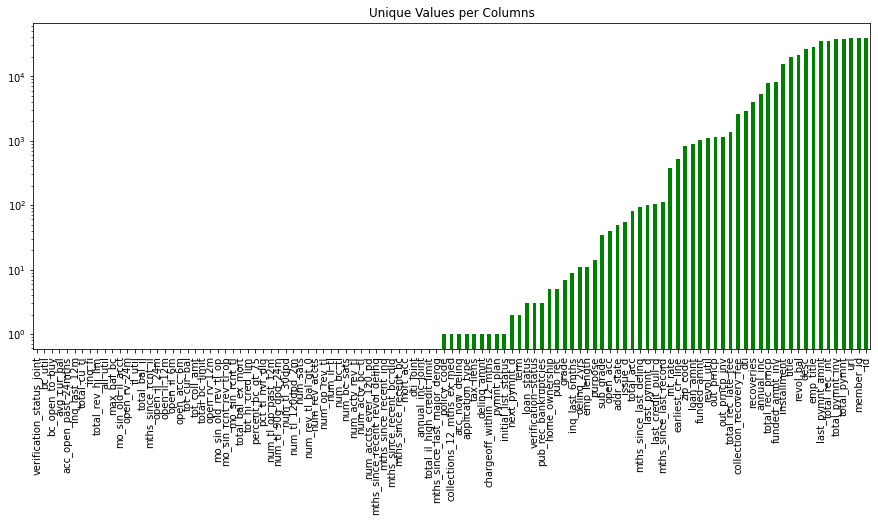

In [352]:
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 6), title="Unique Values per Columns", color = "green");

In [353]:
# Most of numerical analysis needs to be fixed due to null columns
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


#### Conclusion of section 1. Know Your Data
Now, we have a good understanding of our data. We know that out data size is (39717 X 111). Almost half of these columns also have only null values, few have some null values. We have 87 numerical features and 24 categorical features in our dataset. We have also seen their distributions and plotted their unique values. We noticed that few columns have a single value for entire data

### 2. Data Quality & Fix
   - Check null values
   - Check duplicates
   - Remove irrelevant data
   - Impute null values
   - Data cleaning
   - Outlier detection and removal

#### 2.1 Check null values

We know from previous step that half of the columns are null. Let's clean that up.

In [354]:
loan_data.dropna(axis=1, how='all', inplace=True)

In [355]:
# Shape of data has changes with less columns
loan_data.shape

(39717, 57)

#### 2.2 Check duplicates

`id`, `member_id`, and `url` are the unique identifiers of the data-set. We can ignore them and check if we have any duplicate rows.

In [356]:
    # We can't find any row duplicates
    row_duplicates = loan_data.drop(labels=['id', 'member_id', 'url'], axis=1).duplicated().sum()
    row_duplicates

0

#### 2.3 Remove irrelevant data

Let's begin with calculating the percentage of null values in each column

In [357]:
# We could also have done loan_data.isna().sum() but that's very slow in comparision to this approach. Count is read from 
# metadata and is served way faster.

null_counts = loan_data.shape[0] - loan_data.count()

In [358]:
def get_null_count_percentage():
    null_counts = loan_data.shape[0] - loan_data.count()
    total_rows = loan_data.shape[0]
    null_count_percentage = 100 * null_counts / total_rows
    return null_count_percentage

In [359]:
# Check columns with greater than 3 percent nulls
total_rows = loan_data.shape[0]
null_count_percentage = get_null_count_percentage()
null_count_percentage[null_count_percentage > 3]

emp_title                 6.19
desc                     32.58
mths_since_last_delinq   64.66
mths_since_last_record   92.99
next_pymnt_d             97.13
dtype: float64

In [360]:
# This contains company information and looks important paramater in further analysis
loan_data['emp_title'].value_counts().head()

US Army              134
Bank of America      109
IBM                   66
AT&T                  59
Kaiser Permanente     56
Name: emp_title, dtype: int64

In [361]:
# emp title looks like a useful field, we can mark nulls as Unknown in future.
columns = null_count_percentage[null_count_percentage > 7].index
loan_data.drop(labels=columns, axis=1, inplace=True)

We are interested in **loan_status** which is either **Fully paid** or **Charged off** in our analysis, Let's remove other rows

In [362]:
loan_data = loan_data[(loan_data.loan_status == 'Fully Paid') | (loan_data.loan_status == 'Charged Off')]

Some variables have unique count of 1. Since they don't change at all, they can be removed.

In [363]:
# We see that there is no special property in these univariate columns
univariate_columns = loan_data.loc[0:5, loan_data.nunique() == 1]
univariate_columns

,pymnt_plan,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
1,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
2,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
3,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
5,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00


In [364]:
loan_data.drop(univariate_columns, axis=1, inplace=True)

In [366]:
# These field won't be useful for out analysis
loan_data.drop(['member_id', 'url', 'zip_code'], axis=1, inplace=True)

#### 2.4 Impute nulls

In [367]:
null_count_percentage = get_null_count_percentage()
null_count_percentage[null_count_percentage > 0].head()

emp_title      6.19
emp_length     2.68
title          0.03
revol_util     0.13
last_pymnt_d   0.18
dtype: float64

Employer title is useful in analysing relationship between employer and default. We can mark null entries as Unknown for now.

In [368]:
# We will input na as self, since no job is given for them
loan_data.emp_title.fillna(value='Unknown', inplace=True)
loan_data.emp_title.isna().sum()

0

We notice that null percentage is less than 3 percent in general. We will replace all these null values with mod.

In [369]:
less_than_3_percentage_null_data = (get_null_count_percentage()).sort_values(ascending=False)
less_than_3_percentage_null_data = less_than_3_percentage_null_data[(less_than_3_percentage_null_data < 3) & (less_than_3_percentage_null_data > 0)]
for column in less_than_3_percentage_null_data.index:
    mode_val = loan_data[column].mode()[0]
    loan_data[column].fillna(value=mode_val, inplace=True)

#### 2.5 Data cleaning

In [370]:
# Trim percentage to float
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float64')
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float64')

In [371]:
# Converting string amount columns into numeric data

columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_data['emp_length'] = loan_data.emp_length.str.extract('(\d+)')
loan_data[columns] = loan_data[columns].apply(pd.to_numeric)

### Derived column for analysis

In [383]:
# issue_d (mmm-yy) can be broken month and year
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year

# last_pymnt_d (mmm-yy) can be broken month and year
loan_data['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')
loan_data['last_pymnt_month'] = loan_data['last_pymnt_d'].dt.month
loan_data['last_pymnt_year'] = loan_data['last_pymnt_d'].dt.year

loan_data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,last_pymnt_month,last_pymnt_year
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,Unknown,...,0.00,0.00,2015-01-01,171.62,May-16,0.00,12,2011,1,2015
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,...,117.08,1.11,2013-04-01,119.66,Sep-13,0.00,12,2011,4,2013
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,Unknown,...,0.00,0.00,2014-06-01,649.91,May-16,0.00,12,2011,6,2014


### Data Content Analysis

#### Univariate analysis

In [385]:
loan_data['loan_amnt'].describe()

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

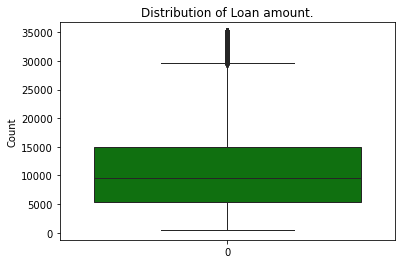

In [421]:
sns.boxplot(data=loan_data.loan_amnt, color="green", linewidth=1)
plt.title("Distribution of Loan amount.")
plt.ylabel("Count")
plt.show()

In [426]:
loan_data.funded_amnt.describe()

count   38577.00
mean    10784.06
std      7090.31
min       500.00
25%      5200.00
50%      9550.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

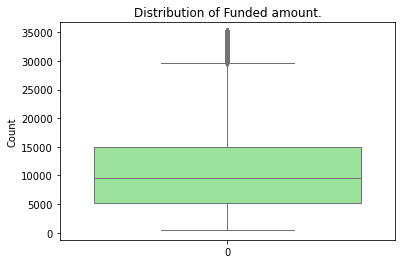

In [424]:
sns.boxplot(data=loan_data.funded_amnt, color="lightgreen", linewidth=1)
plt.title("Distribution of Funded amount.")
plt.ylabel("Count")
plt.show()

In [425]:
loan_data.funded_amnt_inv.describe()

count   38577.00
mean    10222.48
std      7022.72
min         0.00
25%      5000.00
50%      8733.44
75%     14000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

Let's try plotting distribution plot of the loan amount, funded amount, and funded amount by investor.

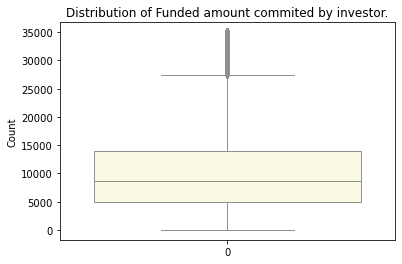

In [423]:
sns.boxplot(data=loan_data.funded_amnt_inv, color="lightyellow", linewidth=1)
plt.title("Distribution of Funded amount commited by investor.")
plt.ylabel("Count")
plt.show()

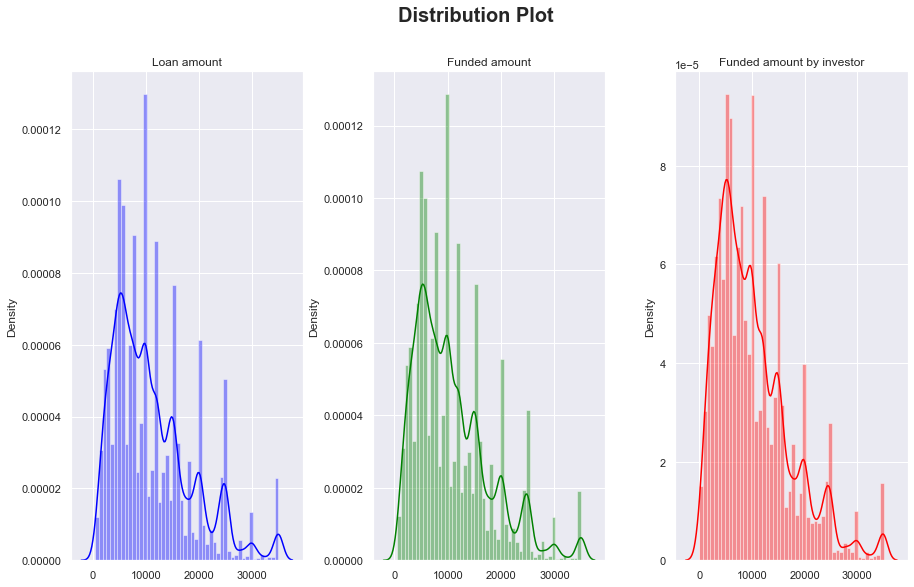

In [478]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize=(15,9))
                                                   
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.distplot(ax=axs[0], x=loan_data.loan_amnt, color='blue')
axs[0].set_title('Loan amount')

sns.distplot(ax=axs[1], x=loan_data.funded_amnt, color='green')
axs[1].set_title('Funded amount')

sns.distplot(ax=axs[2], x=loan_data.funded_amnt_inv, color='red')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
axs[2].set_title('Funded amount by investor')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Distribution Plot', fontsize=20, fontweight='bold')
plt.show()


In [427]:
loan_data.total_pymnt.describe()

count   38577.00
mean    11866.97
std      8809.86
min         0.00
25%      5513.50
50%      9674.05
75%     16136.95
max     58563.68
Name: total_pymnt, dtype: float64

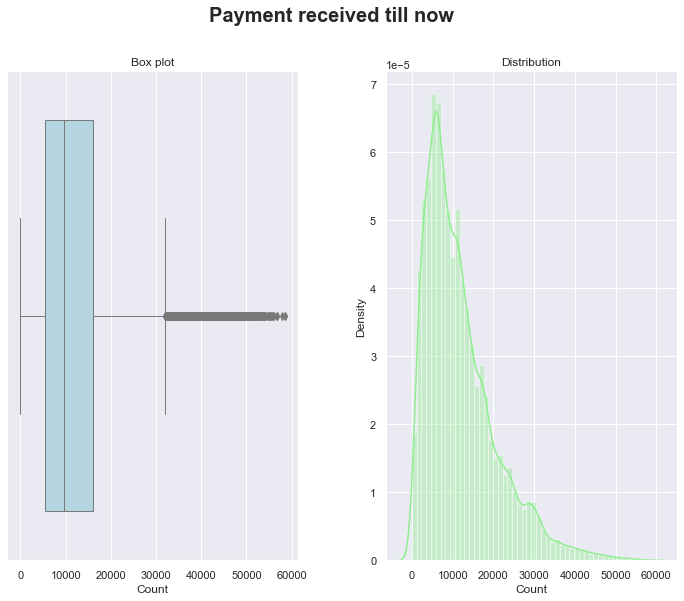

In [498]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], x=loan_data.total_pymnt, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=loan_data.total_pymnt, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Payment received till now', fontsize=20, fontweight='bold')
plt.show()


We got general idea on how much load amount is requested, processed by bank, and approved by the investor. There are few people who get higher loans.

In [430]:
loan_data.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

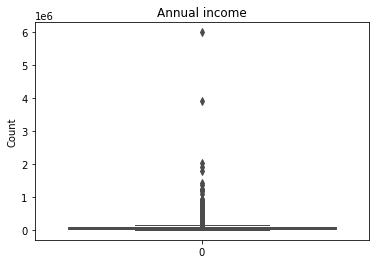

In [432]:
sns.boxplot(data=loan_data.annual_inc, color="red", linewidth=1)
plt.title("Annual income")
plt.ylabel("Count")
plt.show()

In [444]:
print(loan_data.annual_inc.quantile([0.75,0.90, 0.95, 0.97,0.98, 0.99]))

0.75    82000.00
0.90   115000.00
0.95   140004.00
0.97   165000.00
0.98   187000.00
0.99   234144.00
Name: annual_inc, dtype: float64


Due to outliers, the above box plot is unusable, let's try to annual income box plot for 99 percentile

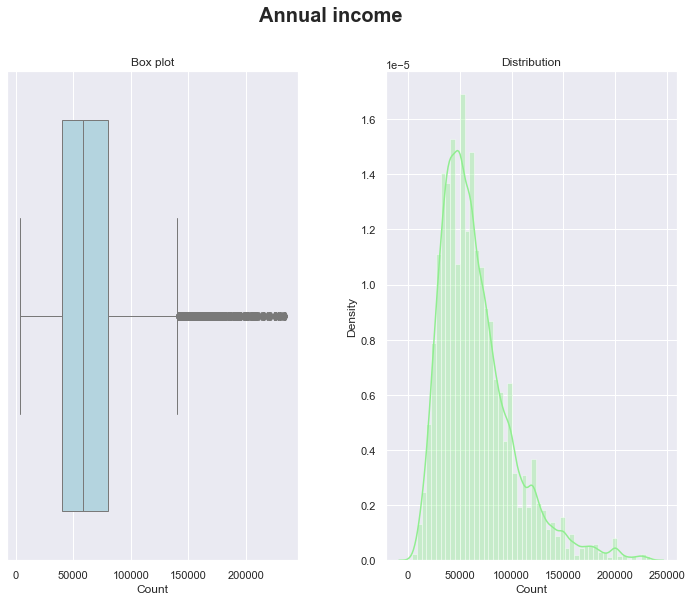

In [497]:
filtered_annual_income = loan_data[loan_data.annual_inc < loan_data.annual_inc.quantile(.99)]

fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], x=filtered_annual_income.annual_inc, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=filtered_annual_income.annual_inc, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Annual income', fontsize=20, fontweight='bold')
plt.show()


Around 50 percent of loan application have income more than 50000. Distribution looks even with little left alignment.

In [479]:
loan_data['int_rate'].describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

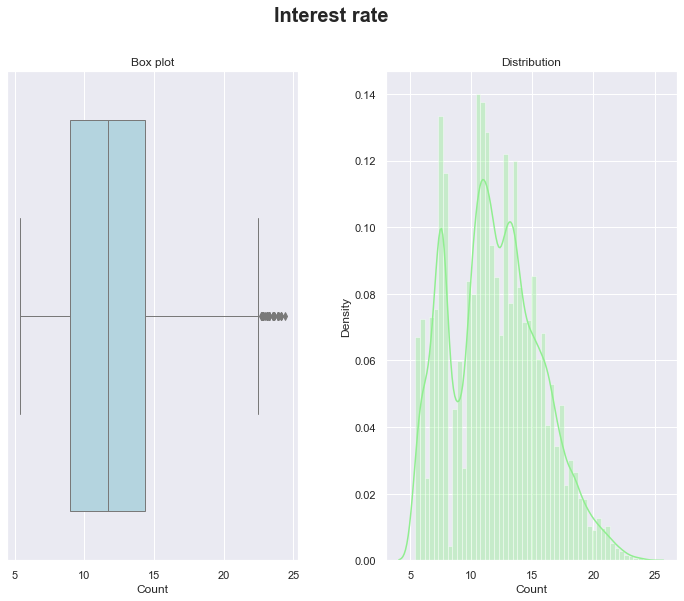

In [500]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], x=loan_data.int_rate, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=loan_data.int_rate, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Interest rate', fontsize=20, fontweight='bold')
plt.show()


In [503]:
loan_data.installment.describe()

count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
max      1305.19
Name: installment, dtype: float64

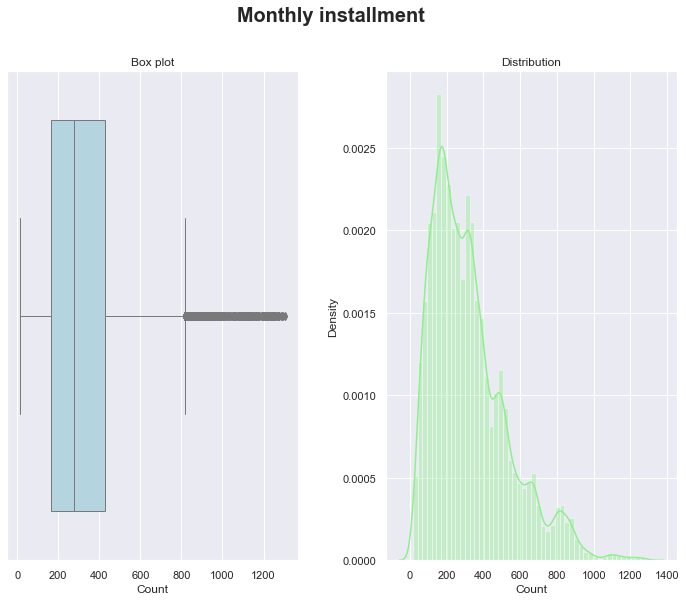

In [504]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], x=loan_data.installment, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=loan_data.installment, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Monthly installment', fontsize=20, fontweight='bold')
plt.show()


Now let's dive into **categorical univariate analysis**

In [506]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year', 'last_pymnt_month',
       'last_pymnt_year'],
      dtype='object')